## Data Wrangling with Python: Intro to Pandas

### Pandas: Why Pandas? What is it?


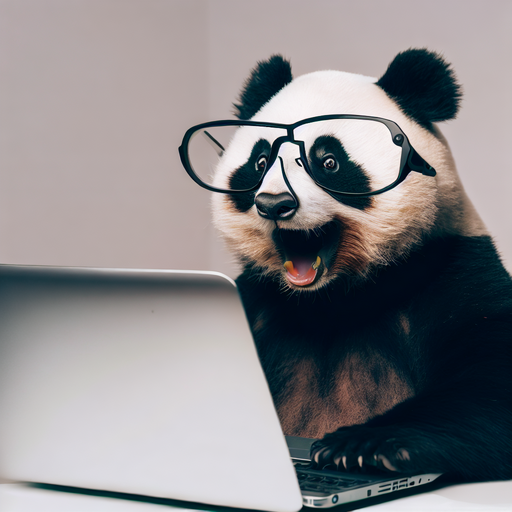

To do data anlaysis with Python, Pandas is a great tool for dealing with data in a tabular and time series formats. Designed by Wes McKinney as an attempt to port R's dataframes to python.

- Python Package for working with **tables**
- Similar to SQL & Excel
    - Faster sometimes
    - More features to manipulate, transform, and aggregate data
- Easy to handle messy and missing data
- Great at working with large datasets
- When combing with other Python libraries, it's fairly easy to create beautiful and customazied visuals. Easy integration with Matplotlib, Seaborn, Plotly.
- Easy integration with machine learning plugins (sckit-learn, etc)
- Libraries for GPU accelerated Pandas and distributed computing Pandas


-----------
To read more about, Wes McKinney, the creator of Pandas, check out the article below.

https://qz.com/1126615/the-story-of-the-most-important-tool-in-data-science/

--------------
Pandas documentation:

https://pandas.pydata.org/docs/

## Think of how we would try to represent a table in Python?


In [430]:
#A dicitonary of lists example
students = {
    'student_id': [1, 2, 3, 4, 5, 6],
    'name': ['Daenerys', 'Jon', 'Arya', 'Sansa', 'Tyrion', 'Khal Drogo'],
    'course_mark': [74, 14, 65, 71, 92, 24],
    'house': ['Targaryen', 'Stark', 'Stark', 'Stark', 'Lannister', 'Dothraki']
}

In [431]:
students

{'student_id': [1, 2, 3, 4, 5, 6],
 'name': ['Daenerys', 'Jon', 'Arya', 'Sansa', 'Tyrion', 'Khal Drogo'],
 'course_mark': [74, 14, 65, 71, 92, 24],
 'house': ['Targaryen', 'Stark', 'Stark', 'Stark', 'Lannister', 'Dothraki']}

In [434]:
students["name"]

['Daenerys', 'Jon', 'Arya', 'Sansa', 'Tyrion', 'Khal Drogo']

**What are some operations we might want to do on this data?**

- 1. Select a subset of columns
- 2. Filter out some rows based on an attribute
- 3. Group by some attribute
- 4. Compute some aggregate values within groups
- 5. Save to a file

How about we try out one of these to see how easy it is

### Return a table with the mean course mark per-house with vanilla Python

In [ ]:
# Return a table with the mean course mark per house

house_sums = {} # Tables of Sums
house_counts = {} # Count per house
for i in range(len(students['house'])):  # iterating over the rows
    house = students['house'][i] # every row number I get house
    course_mark = students['course_mark'][i] #  and course mark
    if house not in house_sums: # Intializing house if not in list
        house_sums[house] = 0
        house_counts[house] = 0
    house_sums[house] += course_mark # Add each course mark for each house
    house_counts[house] += 1

house_means = {}

for house in house_sums: # for every unique house we found
    house_means[house] = house_sums[house] / house_counts[house] #sum/count

house_means

- Did you like looking at this?
- Does this look fun to do?
- what about with 10000 rows and 50 columns?
- Super Tiring.

## Pandas Version

In [433]:
import pandas as pd

# Can take in a dictionary of lists to instantiate a DataFrame
students_df = pd.DataFrame(students)
students_df

,student_id,name,course_mark,house
0,1,Daenerys,74,Targaryen
1,2,Jon,14,Stark
2,3,Arya,65,Stark
3,4,Sansa,71,Stark
4,5,Tyrion,92,Lannister
5,6,Khal Drogo,24,Dothraki


In [435]:
house_means = students_df[['house', 'course_mark']].groupby('house').mean()
house_means

,course_mark
house,
Dothraki,24.0
Lannister,92.0
Stark,50.0
Targaryen,74.0


### Dissecting the above code:


In [436]:
#Step 1: Filter out the columns we want to keep
selected_columns = students_df[['house', 'course_mark']]
selected_columns

,house,course_mark
0,Targaryen,74
1,Stark,14
2,Stark,65
3,Stark,71
4,Lannister,92
5,Dothraki,24


In [437]:
# Step 2: Group by house column
group = selected_columns.groupby('house')

In [438]:
#Step 3: Specify how to aggregate the course-mark column
group.mean()

,course_mark
house,
Dothraki,24.0
Lannister,92.0
Stark,50.0
Targaryen,74.0


#### As shown, Pandas makes use of vectorized operations.


- Rather than use for-loops, we specify the operation that will apply to the structure as a whole (i.e. all the rows)
- By vectorizing, **the code becomes more concise and more readable**
- Pandas is optimized for vectorized operations (parallel vs. serial computation), which makes them **much faster**
- It is almost always possible to vectorize operations on Pandas data types - series have a single data type


### Getting Started: Pandas Series & Pandas DataFrames

There are two Pandas data types of interest:

- Series (column)
    - A pandas series is similar to an array but it has an index. The index is constant, and doesnt change through the operations we apply to the series.
- DataFrame (table)
    - A pandas dataframe is an object that is similar to a collection of pandas series.

In [439]:
# One way to construct a Series
grades = pd.Series([74, 14, 65, 71, 92, 24])
grades

0    74
1    14
2    65
3    71
4    92
5    24
dtype: int64

In [440]:
# We can specify some index when building a series.
grades = pd.Series([74, 14, 65, 71, 92, 24],
                   index=['Daenerys', 'Jon', 'Arya', 'Sansa', 'Eddard', 'Khal Drogo'])

grades

Daenerys      74
Jon           14
Arya          65
Sansa         71
Eddard        92
Khal Drogo    24
dtype: int64

In [441]:
print("The values:", grades.values)
print("The indexes:", grades.index)

The values: [74 14 65 71 92 24]
The indexes: Index(['Daenerys', 'Jon', 'Arya', 'Sansa', 'Eddard', 'Khal Drogo'], dtype='object')


In [442]:
grades['Sansa']

71

In [443]:
grades[3]

C:\Users\sjmit\AppData\Local\Temp\ipykernel_42932\3619711637.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grades[3]


71

### Pandas DataFrames

In [444]:
# One way to construct a DataFrame
df = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5, 6],
    'name': ['Daenerys', 'Jon', 'Arya', 'Sansa', 'Tyrion', 'Khal Drogo'],
    'course_mark': [74, 14, 65, 71, 92, 24],
    'house': ['Targaryen', 'Stark', 'Stark', 'Stark', 'Lannister', 'Dothraki']},
    index=['Hello', 94, 94, 14, 56, 6])
df

,student_id,name,course_mark,house
Hello,1,Daenerys,74,Targaryen
94,2,Jon,14,Stark
94,3,Arya,65,Stark
14,4,Sansa,71,Stark
56,5,Tyrion,92,Lannister
6,6,Khal Drogo,24,Dothraki


In [445]:
df.loc[94]

,student_id,name,course_mark,house
94,2,Jon,14,Stark
94,3,Arya,65,Stark


In [446]:
df.iloc[0]

student_id             1
name            Daenerys
course_mark           74
house          Targaryen
Name: Hello, dtype: object

In [450]:
# reset index
# df.reset_index(inplace=True)
df.reset_index()

,index,student_id,name,course_mark,house
0,Hello,1,Daenerys,74,Targaryen
1,94,2,Jon,14,Stark
2,94,3,Arya,65,Stark
3,14,4,Sansa,71,Stark
4,56,5,Tyrion,92,Lannister
5,6,6,Khal Drogo,24,Dothraki


In [451]:
# set another column as index
df.set_index('student_id')

,name,course_mark,house
student_id,,,
1,Daenerys,74,Targaryen
2,Jon,14,Stark
3,Arya,65,Stark
4,Sansa,71,Stark
5,Tyrion,92,Lannister
6,Khal Drogo,24,Dothraki


In [452]:
df.index = df["student_id"]
df

,student_id,name,course_mark,house
student_id,,,,
1,1,Daenerys,74,Targaryen
2,2,Jon,14,Stark
3,3,Arya,65,Stark
4,4,Sansa,71,Stark
5,5,Tyrion,92,Lannister
6,6,Khal Drogo,24,Dothraki


In [453]:
# access a column
df['name']

student_id
1      Daenerys
2           Jon
3          Arya
4         Sansa
5        Tyrion
6    Khal Drogo
Name: name, dtype: object

In [454]:
# access multiple columns
df[['name', 'house']]

,name,house
student_id,,
1,Daenerys,Targaryen
2,Jon,Stark
3,Arya,Stark
4,Sansa,Stark
5,Tyrion,Lannister
6,Khal Drogo,Dothraki


In [455]:
# accessing a column with dot
df.name

student_id
1      Daenerys
2           Jon
3          Arya
4         Sansa
5        Tyrion
6    Khal Drogo
Name: name, dtype: object

#### Reading a CSV file

We'll use the function `read_csv()` to load the data into our notebook

- The `read_csv()` function can read data from a locally saved file or from a URL
- We'll store the data as a variable `df_pokemon`

In [460]:
# read pokemon data
pokemon = pd.read_csv('pokemon.csv')
# pokemon = pd.read_csv('pokemon.csv', index_col=0)

In [461]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [462]:
# drop '#' column (axis=1)
# pokemon = pokemon.drop(['#', 'Name'], axis=1)
pokemon.drop(columns=['#'], inplace=True)

In [464]:
pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


**What do we see here?**
- Each row of the table is an observation, containing data of a single pokemon

In [465]:
# shape
pokemon.shape

(800, 12)

For large DataFrames, it's often useful to display just the first few or last few rows:

In [466]:
# head
pokemon.head(n=3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [467]:
# tail
pokemon.tail(n=1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
799,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


## Data at a Glance

`pandas` provides many ways to quickly and easily summarize your data:
- How many rows and columns are there?
- What are all the column names and what type of data is in each column?
- How many values are missing in each column or row?
- Numerical data: What is the average and range of the values?
- Text data: What are the unique values and how often does each occur?

### Peeking into the pokemon dataset

- Similar with getting familar with SQL tables, it is often a great idea to look at the pandas dataframes we are working with. Below are some of the basic methods to glance at a dataset.

In [468]:
# looking at columns Attack, Defense and Speed
pokemon[['Attack', 'Defense', 'Speed']].head()

,Attack,Defense,Speed
0,49,49,45
1,62,63,60
2,82,83,80
3,100,123,80
4,52,43,65


In [469]:
# getting info
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [470]:
import numpy as np
np.nan # interpreted as null

None # interpreted as null

'Null' # not interpreted as null

'Null'

In [471]:
# Getting Summary Statistics (description)
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [475]:
# Checking for Missing Data with isna and sum
pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [476]:
pokemon.isna().sum().sum()

386

In [478]:
pokemon.shape[0]

800

In [479]:
# proportions
# pokemon.isna().sum() / len(pokemon)
pokemon.isna().sum() / pokemon.shape[0]

Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

## The .loc() vs .iloc() method


To select rows and columns at the same time, we use the syntax `.loc[ROWS SLICE, COLUMNS SLICE]`:

In [480]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [481]:
# simple slice for column 'Attack' and indices 20:30
# Notice the square brackets on loc
pokemon.loc[20:30, 'Attack']

20    45
21    60
22    80
23    80
24    56
25    81
26    60
27    90
28    60
29    85
30    55
Name: Attack, dtype: int64

In [482]:
# Getting more than one column
pokemon.loc[20:30:2, ['Attack', 'Defense']]

,Attack,Defense
20,45,40
22,80,75
24,56,35
26,60,30
28,60,44
30,55,40


In [483]:
# pass a list for the rows
pokemon.loc[[2,4,5,3,3], ['Attack', 'Defense']]

,Attack,Defense
2,82,83
4,52,43
5,64,58
3,100,123
3,100,123


In [484]:
# iloc is used for integer based indexing
pokemon.iloc[30:25:-2, -1:-5:-1]

,Legendary,Generation,Speed,Sp. Def
30,False,1,90,50
28,False,1,55,54
26,False,1,70,31


In [491]:
list(range(-1,-5,-1))

[-1, -2, -3, -4]

In [489]:
list(range(10, 1, -1))

[10, 9, 8, 7, 6, 5, 4, 3, 2]

In [490]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [487]:
# get column names
pokemon.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# Break Time - 10 minutes

### Modifying a Column or Creating a new column

In [492]:
# this is wrong!
pokemon2 = pokemon
pokemon2.drop(['Name', 'Type 1'], axis=1, inplace=True)
pokemon

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Poison,318,45,49,49,65,65,45,1,False
1,Poison,405,60,62,63,80,80,60,1,False
2,Poison,525,80,82,83,100,100,80,1,False
3,Poison,625,80,100,123,122,120,80,1,False
4,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,Fairy,600,50,100,150,100,150,50,6,True
796,Fairy,700,50,160,110,160,110,110,6,True
797,Ghost,600,80,110,60,150,130,70,6,True
798,Dark,680,80,160,60,170,130,80,6,True


In [523]:
pokemon = pd.read_csv('pokemon.csv').drop('#', axis=1)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [494]:
# Make sure make a copy of your dataframe before doing any modification
# This is generaly best practice, and it will be easier for you to keep track of the various
# changes and states of your dataframe.
# copy in Pandas doesn't act like copy in Python, but more like deep copy in Python
pokemon2 = pokemon.copy(deep=True)

In [495]:
# drop Name from pokemon2
pokemon2.drop('Name', axis=1, inplace=True)

In [498]:
# create a new column
# Combine Attack + Special Attack
pokemon['Total Attack'] = pokemon['Attack'] + pokemon['Sp. Atk']

In [499]:
pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Attack
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,114
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,142
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,182
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,222
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,200
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,320
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,260
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,330


In [500]:
# multiply Total by 2
pokemon['Total'] * 2

0       636
1       810
2      1050
3      1250
4       618
       ... 
795    1200
796    1400
797    1200
798    1360
799    1200
Name: Total, Length: 800, dtype: int64

In [501]:
# Modify Data Frame with .loc() method (rename a pokemon)
pokemon.loc[:4, 'Name'] = 'Steve'

In [502]:
pokemon.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Attack
0,Steve,Grass,Poison,318,45,49,49,65,65,45,1,False,114
1,Steve,Grass,Poison,405,60,62,63,80,80,60,1,False,142
2,Steve,Grass,Poison,525,80,82,83,100,100,80,1,False,182
3,Steve,Grass,Poison,625,80,100,123,122,120,80,1,False,222
4,Steve,Fire,NaN,309,39,52,43,60,50,65,1,False,112
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,144
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,193
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,260
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,263
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,98


### Sort_values() & value_counts()

1. ***df.sort_values()***
2. ***df.value_counts()***


The ***pandas.sort_values()*** allows us to reorder our dataframe in an ascending or descending order given a column for pandas to work from. This is similar to the excel sort function.

```python
import pandas as pd
df = pd.read_csv('random.csv')
df


df.sort_values(by=['some_column'], ascending = True)
```
In the above code snippet, we are sorting our *random.csv* pandas data frame by the column *some_column* in ascending order.

The second function is ***df.value_counts()***, it allows us to count how many times a specific value/item occurred in the dataframe. This function is best used on a specific column on a data frame, ideally on a column representing categorical data. Categorical data refers to a statistical data type consisting of categorical variables.

```python
df['column'].value_counts()
```

In [503]:
# simple sort
# pokemon.sort_values('Total')
pokemon.sort_values('Total', ascending=False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Attack
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,360
164,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,344
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,344
422,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,330
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,50
288,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False,65
446,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False,50
322,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False,40


In [504]:
# sort by two columns
# pokemon.sort_values(['Attack', 'Defense'])
pokemon.sort_values(['Attack', 'Defense'], ascending=[True, False])

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Attack
121,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,40
488,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False,20
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,20
139,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False,25
261,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,330
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,360
429,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,360
232,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,225


In [510]:
# value_counts with or without normalization, dropping NAs
# pokemon.value_counts('Type 2')
# pokemon.value_counts('Type 2', dropna=False)
# pokemon.value_counts('Type 2', normalize=True)
pokemon.value_counts('Type 2', normalize=True, dropna=False).sum()

1.0

In [513]:
# list Unique Values in a column
pokemon['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [514]:
# How many unique Values (nunique)
pokemon['Type 2'].nunique()

18

### How to Query or Filter Data with Conditions?

- We can extract specific data from our dataframe based on a specific condition. We will be using the syntax below. Pandas will return a subset of the dataframe based on the given condition.

```python
df[<insert_condition>]
```

Conditions follow the generic boolean logic in Python. Below is a cheat sheet python boolean logic.

**Conditional Logic:**

Conditional logic refers to the execution of different actions based on whether a certain condition is met. In programming, these conditions are expressed by a set of symbols called **Boolean Operators**.

| Boolean Comparator | Example | Meaning                         |
|--------------------|---------|---------------------------------|
| >                  | x > y   | x is greater than y             |
| >=                 | x >= y  | x is greater than or equal to y |
| <                  | x < y   | x is less than y                |
| <=                 | x <= y  | x is less than or equal to y    |
| !=                 | x != y  | x is not equal to y             |
| ==                 | x == y  | x is equal to y                 |




In [515]:
# Step 1: Create a filter (Total >= 500)
the_filter = pokemon['Total'] >= 500

In [516]:
the_filter

0      False
1      False
2       True
3       True
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Total, Length: 800, dtype: bool

In [517]:
# Step 2: Apply Filter
pokemon.loc[the_filter]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Attack
2,Steve,Grass,Poison,525,80,82,83,100,100,80,1,False,182
3,Steve,Grass,Poison,625,80,100,123,122,120,80,1,False,222
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,193
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,260
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,200
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,320
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,260
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,330


In [ ]:
# fast way
pokemon.loc[pokemon['Total']>=500]

In [518]:
# filter by two conditions (| for 'OR', & for 'AND')
pokemon.loc[(pokemon['Total'] < 600) |
        ((pokemon['Attack'] < 100) &
        (pokemon['Defense'] < 50))]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Attack
0,Steve,Grass,Poison,318,45,49,49,65,65,45,1,False,114
1,Steve,Grass,Poison,405,60,62,63,80,80,60,1,False,142
2,Steve,Grass,Poison,525,80,82,83,100,100,80,1,False,182
4,Steve,Fire,NaN,309,39,52,43,60,50,65,1,False,112
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False,158
788,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False,101
789,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False,161
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False,75


Additionally, we can use the pandas **.where()** function, which has the following syntax.


```python
df.where(<condition>, <What to fill inplace where the condition is not True>) # default is Nan
```

In [519]:
# where() to replace name to "Weak pokemon"
pokemon['Name'] = pokemon['Name'].where(pokemon['Total']>400, 'Weak pokemon')
pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Attack
0,Weak pokemon,Grass,Poison,318,45,49,49,65,65,45,1,False,114
1,Steve,Grass,Poison,405,60,62,63,80,80,60,1,False,142
2,Steve,Grass,Poison,525,80,82,83,100,100,80,1,False,182
3,Steve,Grass,Poison,625,80,100,123,122,120,80,1,False,222
4,Weak pokemon,Fire,NaN,309,39,52,43,60,50,65,1,False,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,200
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,320
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,260
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,330


In [524]:
pokemon.loc[pokemon["Total"] <= 400, "Name"] = "Weak pokemon"

In [525]:
pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Weak pokemon,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Weak pokemon,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### extra: changing data type

In [526]:
df = pd.DataFrame({'col1':[1,2,3,4,5],
                   'col2':['1','2','3','4','5']})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    5 non-null      int64 
 1   col2    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [527]:
# astype(float)
df['col2'] = df['col2'].astype(float)

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5 non-null      int64  
 1   col2    5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 212.0 bytes


### Grouping and Aggregation

Grouping and aggregation can be used to calculate statistics on groups in the data.

**Common Aggregation Functions**
- mean()
- median()
- sum()
- count()


In [531]:
# simple groupby Type1 and mean()
pokemon.groupby('Type 1').mean(numeric_only=True)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


- By default, `groupby()` assigns the variable that we're grouping on (in this case `Type 1`) to the index of the output data
- If we use the keyword argument `as_index=False`, the grouping variable is instead assigned to a regular column
  - This can be useful in some situations, such as data visualization functions which expect the relevant variables to be in columns rather than the index

In [532]:
# grouby with as_index set to False
pokemon.groupby('Type 1', as_index=False).mean(numeric_only=True)

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bug,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
1,Dark,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
2,Dragon,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
3,Electric,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
4,Fairy,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
5,Fighting,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
6,Fire,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
7,Flying,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
8,Ghost,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500
9,Grass,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143,0.042857


In [533]:
# multiple columns
pokemon.groupby(['Type 1', 'Type 2'])[['Attack', 'Defense']].median(numeric_only=True)

Attack  Defense
Type 1 Type 2                   
Bug    Electric    62.0     55.0
       Fighting   155.0     95.0
       Fire        72.5     60.0
       Flying      67.5     50.0
       Ghost       90.0     45.0
...                 ...      ...
Water  Ice         85.0     80.0
       Poison      70.0     65.0
       Psychic     75.0     85.0
       Rock        84.0    116.5
       Steel       86.0     88.0

[136 rows x 2 columns]

We can use the `agg` method to compute multiple aggregate functions on our data, for example minimum, maximum and mean attack in Type 1

In [534]:
# combine multiple agg functions
pokemon.groupby(['Type 1', 'Type 2'])[['Attack', 'Defense']].agg(['min', 'max', 'mean'])

Attack                  Defense                 
                   min  max        mean     min  max        mean
Type 1 Type 2                                                   
Bug    Electric     47   77   62.000000      50   60   55.000000
       Fighting    125  185  155.000000      75  115   95.000000
       Fire         60   85   72.500000      55   65   60.000000
       Flying       20  155   70.142857      30  120   61.571429
       Ghost        90   90   90.000000      45   45   45.000000
...                ...  ...         ...     ...  ...         ...
Water  Ice          70   95   83.333333      80  180  113.333333
       Poison       40   95   68.333333      35   75   58.333333
       Psychic      65   75   73.000000      65  180  104.000000
       Rock         55  108   82.750000      85  133  112.750000
       Steel        86   86   86.000000      88   88   88.000000

[136 rows x 6 columns]

We can also use `agg` to compute different agg functions for different columns:

In [535]:
agg_dict = {
    'Attack' : 'mean',
    'Defense': ['min', 'median', 'max']
}

In [536]:
pokemon.groupby(['Type 1', 'Type 2']).agg(agg_dict)

Attack Defense            
                       mean     min median  max
Type 1 Type 2                                  
Bug    Electric   62.000000      50   55.0   60
       Fighting  155.000000      75   95.0  115
       Fire       72.500000      55   60.0   65
       Flying     70.142857      30   50.0  120
       Ghost      90.000000      45   45.0   45
...                     ...     ...    ...  ...
Water  Ice        83.333333      80   80.0  180
       Poison     68.333333      35   65.0   75
       Psychic    73.000000      65   85.0  180
       Rock       82.750000      85  116.5  133
       Steel      86.000000      88   88.0   88

[136 rows x 4 columns]

### Challenge 1 (20 minutes)

Let's play around with Pandas on a more intricate dataset: a dataset on wines!

**Challenge 14 from the 21 Day Data Challenge**

Dot's neighbour said that he only likes wine from Stellenbosch, Bordeaux, and the Okanagan Valley, and that the sulfates can't be that high. The problem is, Dot can't really afford to spend tons of money on the wine. Dot's conditions for searching for wine are:
1. Sulfates cannot be higher than 0.6.
2. The price has to be less than  $20.

Use the above conditions to filter the data for questions **2 and 3** below.

**Questions:**
1. Where is Stellenbosch, anyway? How many wines from Stellenbosch are there in the *entire dataset*?
2. *After filtering with the 2 conditions*, what is the average price of wine from the Bordeaux region?
3. *After filtering with the 2 conditions*, what is the least expensive wine that's of the highest quality from the Okanagan Valley?



**Stretch Question:**
1. What is the average price of wine from Stellenbosch, according to the entire unfiltered dataset?


**Note: Check the dataset to see if there are missing values; if there are, fill in missing values with the mean.**


In [537]:
wines_df = pd.read_csv('winequality-red_2.csv', index_col=0)

In [538]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,region,price
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Colchagua Valley,64
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bordeaux,89
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,La Rjoja,25
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Willamette,27
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Marlborough,9


In [542]:
wines_df.shape

(1599, 14)

In [540]:
wines_df['region'].value_counts()["Stellenbosch"]

35

In [541]:
wines_df.loc[(wines_df['sulphates'] <= .6) & (wines_df['price'] < 20)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,region,price
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Marlborough,9
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,Okanagan Valley,10
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,Bordeaux,9
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,5,Bordeaux,5
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,Bordeaux,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5,Marlborough,4
1562,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,Bordeaux,8
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6,Bordeaux,12
1580,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,Bordeaux,17


In [543]:
# filter original dataframe based on conditions
# Sulfates cannot be higher than 0.6
# The price has to be less than $20
wines_df_filtered = wines_df[(wines_df['sulphates'] <= 0.6) &
                             (wines_df['price'] < 20)]

In [544]:
wines_df_filtered[['sulphates', 'price']].describe()

,sulphates,price
count,109.000000,109.000000
mean,0.548073,11.550459
std,0.045997,4.943170
min,0.430000,4.000000
25%,0.520000,7.000000
50%,0.560000,12.000000
75%,0.580000,16.000000
max,0.600000,19.000000


In [547]:
# Q1 - How many wines from Stellenbosch are there in the entire dataset?
# len(wines_df.loc[wines_df['region']=='Stellenbosch'])
# wines_df[wines_df['region']=='Stellenbosch'].shape[0]
wines_df.groupby('region').size()['Stellenbosch']

35

In [549]:
# Q2 - After filtering with the 2 conditions,
# what is the average price of wine from the Bordeaux region?
wines_df_filtered.loc[wines_df_filtered['region']=='Bordeaux', 'price'].mean()
# wines_df_filtered.groupby('region')['price'].mean()['Bordeaux']

11.3

In [551]:
wines_df_filtered.loc[wines_df_filtered['region']=='Bordeaux']['price'].mean()

11.3

In [552]:
ok = wines_df_filtered.loc[wines_df_filtered['region'] == 'Okanagan Valley']

In [557]:
ok.sort_values(by=['price', 'quality'], ascending=[True, False]).iloc[0]

fixed acidity                       8.6
volatile acidity                   0.83
citric acid                         0.0
residual sugar                      2.8
chlorides                         0.095
free sulfur dioxide                17.0
total sulfur dioxide               43.0
density                         0.99822
pH                                 3.33
sulphates                           0.6
alcohol                            10.4
quality                               6
region                  Okanagan Valley
price                                 4
Name: 1025, dtype: object

In [ ]:
# Q3 - After filtering with the 2 conditions,
# what is the least expensive wine that's of the
# highest quality from the Okanagan Valley?
wines_df_filtered.loc[wines_df_filtered['region']=='Okanagan Valley'].\
                  sort_values(['price', 'quality'], ascending=[True, False]).iloc[0]

### Challenge 2 (25 minutes)

**Challenge 21 from the 21DDC (Adapted)**

Dot wants to play retro video games with all their new friends! Help them figure out which games would be best.

Questions:

1. What is the top 5 best selling games released before the year 2000.

     -  **Note**: Use Global_Sales


2. Create a new column called Aggregate_Score, which returns the proportional average between Critic Score and User_Score based on Critic_Count and User_Count. Plot a horizontal bar chart of the top 5 highest rated games by Aggregate_Score, not published by Nintendo before the year 2000. From this bar chart, what is the highest rated game by Aggregate_Score?

    -  **Note**: Critic_Count should be filled with the mean. User_Count should be filled with the median.


#### In the exercise above, there is some missing values in the dataset. Look up the pandas documentation to figure out how to fill missing values in a column. You will be using the **fillna()** function.

# HINT

**How to create the Aggregate Score Column?**

\begin{equation*}
AggregateScore = \frac{(CriticCount * CriticScore)+(UserCount * UserScore)}{UserCount + CriticCount}
\end{equation*}

**Check Your Column Values**

The Critic_Score column is scored out of 100. The User_Score column is scored out of 10. You will need to modify one of the columns to match the other.

In [568]:
# code here
df = pd.read_csv('video_games.csv')
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,7.5,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [ ]:
df["Aggregate_Score"] = ((a * b) + (c * d)) / (c + a)

In [559]:
top5 = df.loc[df["Year_of_Release"] < 2000].nlargest(n=5, columns="Global_Sales")

In [560]:
top5

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,7.5,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,7.5,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,7.5,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,7.5,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,7.5,NaN,NaN,NaN


In [562]:
top5 = df.loc[df["Year_of_Release"] < 2000].sort_values(by="Global_Sales", ascending=False).iloc[:5]
top5

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,7.5,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,7.5,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,7.5,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,7.5,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,7.5,NaN,NaN,NaN


In [563]:
critic_count_mean = df["Critic_Count"].mean()
user_count_median = df["User_Count"].median()
value_mapping = {"Critic_Count": critic_count_mean, "User_Count": user_count_median}

In [564]:
critic_count_mean, user_count_median

(26.360820941378886, 24.0)

In [565]:
df = df.fillna(value_mapping)

In [569]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score            0
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df["User_Score"] = df["User_Score"] * 10
df.head(3)

In [ ]:
df["Aggregate_Score"] = ((df["Critic_Count"] * df["Critic_Score"]) + (df["User_Count"] * df["User_Score"])) / (df["User_Count"] + df["Critic_Count"])
df.head(3)

In [ ]:
aggregate_top_5 = df.loc[(df["Year_of_Release"] < 2000) & (df["Publisher"] != "Nintendo")].nlargest(n=5, columns="Aggregate_Score")
aggregate_top_5

## Documentation

In the meantime, check out pandas the user guide in the [pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

-------
**Why should I use the documentation?**

On the job as a data scientist or data analyst, more often than not, you may find yourself looking up the documentation of a particular function or plugin you use. Don't worry if there are a few functions you don't know by heart. However, there are just too many to know! An essential skill is to learn how to navigate documentation and understand how to apply the examples to your work.

--------

Additional resources:

- To learn more about these topics, as well as other topics not covered here (e.g. reshaping, merging, additional subsetting methods, working with text data, etc.) check out [these introductory tutorials](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) from the `pandas` documentation
- To learn more about subsetting your data, check out [this tutorial](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#min-tut-03-subset)
- This [pandas cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may also be helpful as a reference.